In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
from bs4 import BeautifulSoup
import requests
import random as rd
!pip install lxml
import lxml


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Travail


In [102]:
url = "https://inegalites.fr/Les-inegalites-de-salaires-entre-les-femmes-et-les-hommes-etat-des-lieux"
import pandas as pd

# Définir les données
data = {
    'Niveau de rémunération': [
        '10 %',
        '20 %',
        '30 %',
        '40 %',
        '50 %',
        '60 %',
        '70 %',
        '80 %',
        '90 %',
        'top 5 %',
        'top 1 %',
        'Ensemble'
    ],
    'Hommes (en euros)': [1400, 1571, 1731, 1906, 2104, 2354, 2695, 3233, 4317, 5671, 10785, 2689],
    'Femmes (en euros)': [1336, 1465, 1587, 1725, 1889, 2095, 2372, 2786, 3577, 4533, 7734, 2292],
    'Ensemble (en euros)': [1366, 1520, 1664, 1825, 2012, 2243, 2558, 3041, 4010, 5211, 9602, 2524],
    'Écart (en euros)': [-64, -106, -144, -181, -215, -259, -323, -447, -740, -1138, -3051, -397],
    'Écart (en %)': [-5, -7, -8, -9, -10, -11, -12, -14, -17, -20, -28, -15]
}

# Créer le DataFrame
df_remun = pd.DataFrame(data)



In [103]:
df_remun

,Niveau de rémunération,Hommes (en euros),Femmes (en euros),Ensemble (en euros),Écart (en euros),Écart (en %)
0,10 %,1400,1336,1366,-64,-5
1,20 %,1571,1465,1520,-106,-7
2,30 %,1731,1587,1664,-144,-8
3,40 %,1906,1725,1825,-181,-9
4,50 %,2104,1889,2012,-215,-10
5,60 %,2354,2095,2243,-259,-11
6,70 %,2695,2372,2558,-323,-12
7,80 %,3233,2786,3041,-447,-14
8,90 %,4317,3577,4010,-740,-17
9,top 5 %,5671,4533,5211,-1138,-20


In [113]:
import os
# Créer le répertoire s'il n'existe pas
directory = "Ecart de rémunération H/F selon les revenus"
if not os.path.exists(directory):
    os.makedirs(directory)

# Enregistrer le DataFrame au format JSON dans le répertoire
df_remun.to_json(os.path.join(directory, "ecart_remuneration.json"))


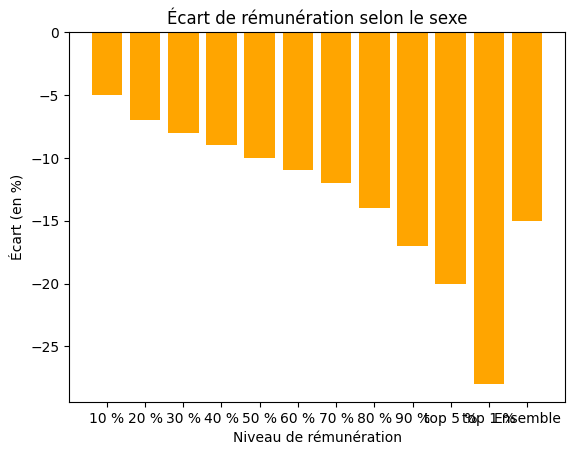

<Figure size 640x480 with 0 Axes>

In [116]:
import matplotlib.pyplot as plt

# Créer un histogramme
plt.bar(df_remun['Niveau de rémunération'], df_remun['Écart (en %)'], color="orange")

# Ajouter un titre et des étiquettes aux axes
plt.title('Écart de rémunération selon le sexe')
plt.xlabel('Niveau de rémunération')
plt.ylabel('Écart (en %)')

# Afficher le graphique
plt.show()
plt.savefig(r'C:\Users\bapti\Desktop\Hackathon_Inclusion\Ecart de rémunération H\F selon les revenus\ecart_remuneration.png')


In [124]:
data_pol_maire = pd.read_csv(r"C:\Users\bapti\Desktop\Hackathon_Inclusion\maire hf.csv", sep=";", encoding="latin-1")

In [125]:
data_pol_maire[f"% homme"]= abs(100-data_pol_maire[f"% femme"].str.replace(",",".").astype(float))


In [126]:
data_pol_maire[f"% femme"]= data_pol_maire[f"% femme"].str.replace(",",".").astype(float)
data_pol_maire

import os
# Créer le répertoire s'il n'existe pas
directory = "representation des femmes dans les maires et conseils locaux"
if not os.path.exists(directory):
    os.makedirs(directory)

# Enregistrer le DataFrame au format JSON dans le répertoire
data_pol_maire.to_json(r"C:\Users\bapti\Desktop\Hackathon_Inclusion\representation des femmes dans les maires et conseils locaux.json")


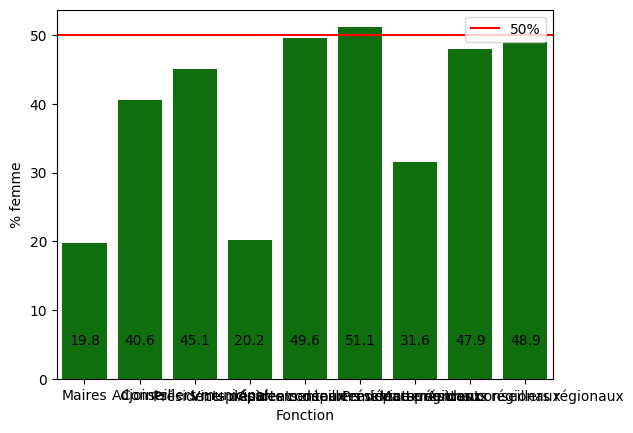

<Figure size 640x480 with 0 Axes>

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le graphique à barres
ax = sns.barplot(data=data_pol_maire, y="% femme", x="Fonction", color="green")

# Ajouter une ligne horizontale à 50%
ax.axhline(y=50, color='red', linestyle='-', label='50%')

# Ajouter une légende
ax.legend()

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + 5, f'{p.get_height():.1f}', ha='center')

# Afficher le graphique
plt.show()
plt.savefig(r"C:\Users\bapti\Desktop\Hackathon_Inclusion\representation des femmes dans les maires et conseils locaux\rep pol locale.png")


In [132]:
# Charger les données
data_education = pd.read_csv(r"https://publication.enseignementsup-recherche.gouv.fr/eesr/7/Export_CSV_EESR7_ES_24-2.php")
data_education.columns = ["Diplome", "% de femmes - SCIENCE", "% de femmes - Toute discipline"]
data_education.dropna(inplace=True)

# Calculer les pourcentages d'hommes
data_education["% de femmes - SCIENCE"] = data_education["% de femmes - SCIENCE"].astype("float")*100
data_education["% de femmes - Toute discipline"] = data_education["% de femmes - Toute discipline"].astype("float")*100
data_education["% homme - SCIENCE"] = round(abs(100 - data_education["% de femmes - SCIENCE"].astype("float")),2)
data_education["% homme - all"] = round(abs(100 - data_education["% de femmes - Toute discipline"].astype("float")),2)

data_education

,Diplome,% de femmes - SCIENCE,% de femmes - Toute discipline,% homme - SCIENCE,% homme - all
2,HDR,27.0,33.0,73.0,67.0
3,Doctorat,38.0,44.0,62.0,56.0
4,Master,41.0,60.0,59.0,40.0
5,Licence générale,43.0,63.0,57.0,37.0


In [133]:
data_education.to_json(r"C:\Users\bapti\Desktop\Hackathon_Inclusion\Part des femmes par niveau de diplome.json")

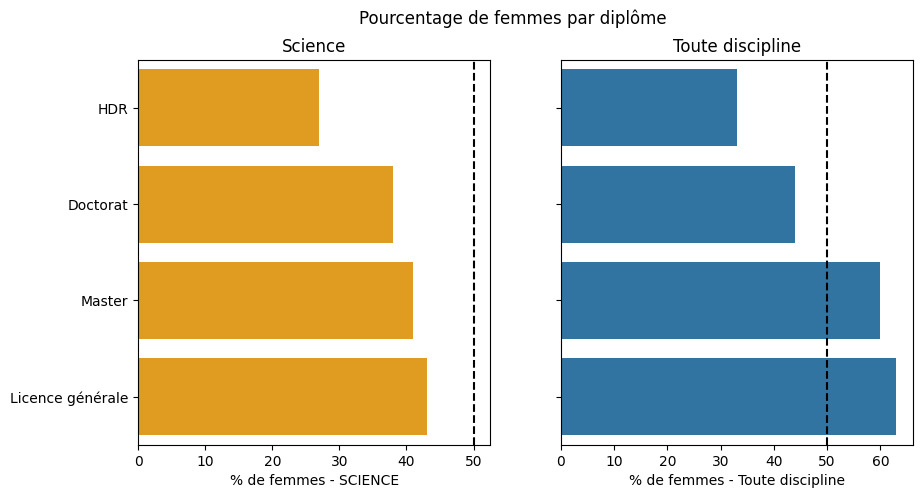

<Figure size 640x480 with 0 Axes>

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Graphique pour "% de femmes - SCIENCE"
sns.barplot(data=data_education, x="% de femmes - SCIENCE", y="Diplome", ax=ax1, color="orange")
ax1.set_title('Pourcentage de femmes en science')
ax1.axvline(x=50, color="black", linestyle="--")
ax1.set_title('Science') 
ax1.set_ylabel('')
# Graphique pour "% de femmes - Toute discipline"
sns.barplot(data=data_education, x="% de femmes - Toute discipline", y="Diplome", ax=ax2)
ax2.set_title('Pourcentage de femmes toutes disciplines')
ax2.axvline(x=50, color="black", linestyle="--")
ax2.set_title('Toute discipline') 
ax2.set_ylabel('')


fig.suptitle('Pourcentage de femmes par diplôme') 

plt.show()
plt.savefig(fr"C:\Users\bapti\Desktop\Hackathon_Inclusion\rep par niveau diplome F-H.png")


In [92]:
import pandas as pd

# Créer un dictionnaire pour stocker les données
data = {
    'Annee': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Violences physiques ou sexuelles - Femmes': [3.1, 3.7, 2.6, 2.4, 2.4, 2.4, 3.2, 3.6, 2.9, 3.2, 3.0],
    'Violences physiques ou sexuelles - Hommes': [3.7, 4.4, 3.2, 3.1, 3.3, 2.7, 3.1, 3.0, 2.5, 2.2, 3.3],
    'Violences physiques ou sexuelles - Ensemble': [3.4, 4.0, 2.9, 2.7, 2.9, 2.5, 3.2, 3.3, 2.7, 2.7, 3.1],
    'Menaces, injures ou insultes - Femmes': [18.0, 17.0, 16.4, 15.0, 15.8, 17.2, 19.7, 19.9, 18.9, 18.5, 17.7],
    'Menaces, injures ou insultes - Hommes': [17.8, 15.8, 16.3, 13.6, 17.8, 14.9, 16.3, 15.6, 14.7, 16.8, 14.8],
    'Menaces, injures ou insultes - Ensemble': [17.9, 16.4, 16.3, 14.3, 16.8, 16.0, 18.0, 17.8, 16.8, 17.6, 16.3],
    'Vols avec ou sans violences - Femmes': [2.5, 3.9, 3.0, 3.0, 2.7, 4.2, 3.5, 2.4, 2.3, 4.2, 2.3],
    'Vols avec ou sans violences - Hommes': [3.7, 3.4, 4.5, 3.3, 4.5, 4.2, 3.0, 3.4, 2.8, 3.2, 4.3],
    'Vols avec ou sans violences - Ensemble': [3.1, 3.7, 3.8, 3.2, 3.6, 4.2, 3.2, 2.8, 2.5, 3.7, 3.3]
}

# Créer le DataFrame
df = pd.DataFrame(data)

# Afficher le DataFrame
df.head()
df["Annee"] = df["Annee"].astype("int")

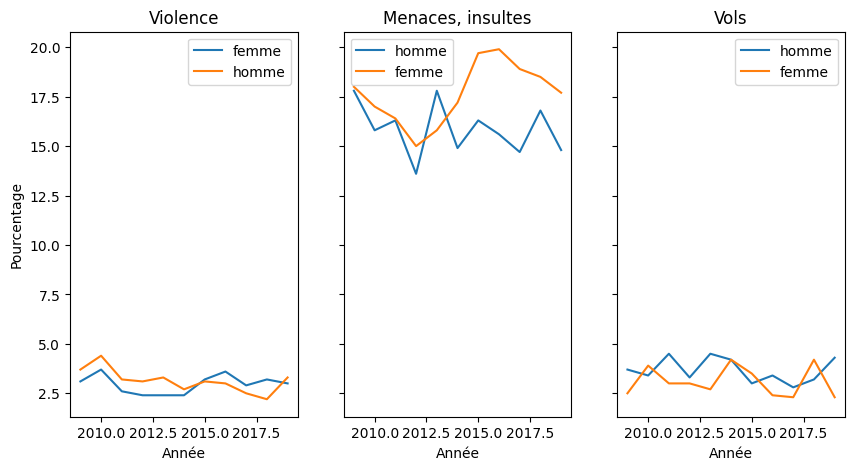

In [93]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes de données pour les femmes et les hommes
cols_femmes = [col for col in df.columns if col.startswith('Femmes')]
cols_hommes = [col for col in df.columns if col.startswith('Hommes')]

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

ax1.plot(df['Annee'].astype("int"), df['Violences physiques ou sexuelles - Femmes'], label='femme')
ax1.plot(df['Annee'].astype("int"), df['Violences physiques ou sexuelles - Hommes'], label='homme')

ax1.set_title('Violence')
ax1.set_xlabel('Année')
ax1.set_ylabel('Pourcentage')
ax1.legend()


ax2.plot(df['Annee'].astype("int"), df['Menaces, injures ou insultes - Hommes'], label='homme')
ax2.plot(df['Annee'].astype("int"), df['Menaces, injures ou insultes - Femmes'], label='femme')

ax2.set_title('Menaces, insultes')
ax2.set_xlabel('Année')
ax2.legend()

ax3.plot(df['Annee'].astype("int"), df['Vols avec ou sans violences - Hommes'], label='homme')
ax3.plot(df['Annee'].astype("int"), df['Vols avec ou sans violences - Femmes'], label='femme')

ax3.set_title('Vols')
ax3.set_xlabel('Année')
ax3.legend()


plt.show()


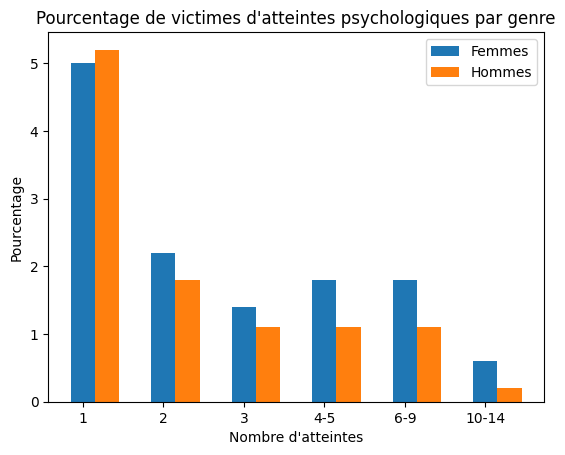

<Figure size 640x480 with 0 Axes>

In [145]:
import matplotlib.pyplot as plt

# Données
labels = ['1', '2', '3',
          '4-5', '6-9',
          '10-14']
femmes = [5.0, 2.2, 1.4, 1.8, 1.8, 0.6]
hommes = [5.2, 1.8, 1.1, 1.1, 1.1, 0.2]

# Créer le graphique
fig, ax = plt.subplots()

# Tracer les barres pour les femmes
ax.bar(labels, femmes, width=0.3, label='Femmes')

# Décaler les barres pour les hommes
hommes_x = [x + 0.3 for x in range(len(labels))]
ax.bar(hommes_x, hommes, width=0.3, label='Hommes')
# Ajouter des légendes et des titres
ax.set_xlabel('Nombre d\'atteintes')
ax.set_ylabel('Pourcentage')
ax.set_title('Pourcentage de victimes d\'atteintes psychologiques par genre')
ax.legend()

plt.show()


plt.savefig(r"C:\Users\bapti\Desktop\Hackathon_Inclusion\atteintes psy.png")

In [146]:
df_securite = pd.DataFrame([labels,femmes,hommes], columns=["1","2","3","4-5","6-9","10-14"])
df_securite.to_json(r"C:\Users\bapti\Desktop\Hackathon_Inclusion\tb atteinte psy par genre.json")
